In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

plt.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus = False)

In [2]:
data = pd.read_csv('/home/piai/python/A3_홈쇼핑/1114_data.csv')

In [12]:
data['MD담당자명'].value_counts()

이서소,최의     1983
전상운,박경은    1710
최주나        1256
최백원        1208
가길호,남주혜    1011
           ... 
신대혁,전은혁       2
엄은미,최성욱       2
유명은,권동인       1
최성욱,양규석       1
최미옥,이서소       1
Name: MD담당자명, Length: 104, dtype: int64

In [13]:
data['실패'] = np.where(data['금액달성률']<100, 1, 0)
data['MD'] = np.where(data["MD담당자명"].str[:3]==data["MD담당자명"].str[4:7], data["MD담당자명"].str[:3], data["MD담당자명"])

In [14]:
data['MD'].value_counts()

이서소,최의      1983
전상운,박경은     1710
최주나         1256
최백원         1208
전승아         1083
            ... 
신대혁,전은혁        2
박조호A,전승아       2
유명은,권동인        1
최미옥,이서소        1
최성욱,양규석        1
Name: MD, Length: 98, dtype: int64

In [30]:
dd = data.groupby(['카테고리', 'SH', 'MD', 'PD', 'TD'])['실패'].agg(['sum', 'count'])
dd['성공비율'] = 1-(dd['sum']/dd['count'])
dd.to_csv('카테고리_제작.csv')

In [33]:
dd = pd.DataFrame(dd)
dd.reset_index
dd = pd.DataFrame(dd)
de = dd[dd['count']>10]
df = de[de['성공비율']>0.5]
df

sum  count      성공비율
카테고리 SH       MD      PD  TD                        
가공농산 이효만      최만훈     박이환 최백장     4     12  0.666667
생활용품 최채원,이장혁  이서소,최의  최조환 최백장     3     15  0.800000
신선농산 최규좌,이주영A 이은혜     강승필 임미라     5     13  0.615385
인테리어 최규좌,최규재  전상운,박경은 이재가 이재혁     2     11  0.818182
침구   강규주,박승희  이수만     강주우 이인호     4     12  0.666667
     백이숙,박채린  이수만     국재열 송창장     5     15  0.666667
     백이숙,신유이  최백원     이재가 최규식B    5     13  0.615385

<AxesSubplot:xlabel='소요분', ylabel='금액달성률'>

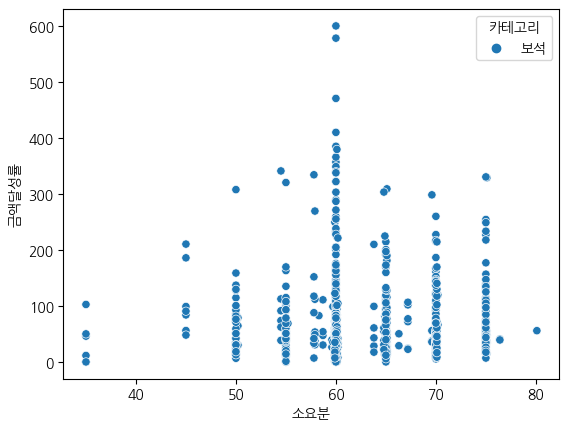

In [68]:
sns.scatterplot(data = jewerly, x = '소요분', y='금액달성률', hue='카테고리')

In [113]:
data = pd.read_csv('/home/piai/python/A3_홈쇼핑/1114_data.csv')

In [114]:
data1 = data[['소요분', '가중분', '판매단가', '매출', '실수량', '단위시간영업효율','금액달성률', '실패', '카테고리']]
clothes = data1[data1['카테고리']== '의류']
health = data1[data1['카테고리']== '건강식품']
ganong = data1[data1['카테고리']== '가공농산']
sinsu = data1[data1['카테고리']== '신선수산']
etc = data1[data1['카테고리']== '잡화']
life = data1[data1['카테고리']== '생활용품']
under = data1[data1['카테고리']== '언더웨어']
sinnong = data1[data1['카테고리']== '신선농산']
beauty = data1[data1['카테고리']== '이미용']
kitchen = data1[data1['카테고리']== '주방용품']
gasu = data1[data1['카테고리']== '가공수산']
gachuck = data1[data1['카테고리']== '가공축산']
bed = data1[data1['카테고리']== '침구']
sinchuck = data1[data1['카테고리']== '신선축산']
cultures = data1[data1['카테고리']== '문화서비스']
elec = data1[data1['카테고리']== '가전']
lclothes = data1[data1['카테고리']== '레포츠의류']
lelec = data1[data1['카테고리']== '레포츠기기']
interior = data1[data1['카테고리']== '인테리어']
sangjo = data1[data1['카테고리']== '상조']
jewerly = data1[data1['카테고리']== '보석']


KeyError: "['실패'] not in index"

<AxesSubplot:>

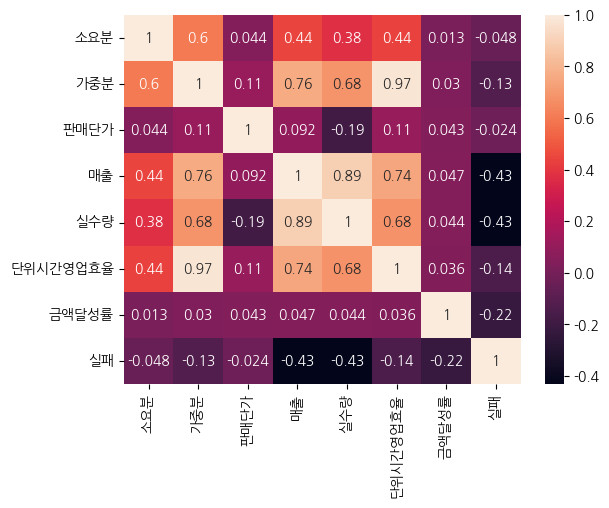

In [115]:
#clothes(가중분, 매출), health, ganong(단위시간영업효율, 실수량/매출), sinsu(매출/가중분
# etc, life, under, sinnong, beauty, kitchen, gasu, 
# gachuck, bed, sinchuck, cultures, elec, lclothes, interior, snagjo, jewerly
sns.heatmap(sinsu.corr(), annot = True)

In [116]:
flw = pd.read_csv('/home/piai/python/A3_홈쇼핑/소비자물가지수.csv',encoding = 'euc-kr')
flw

,시점,전국
0,2020.01,100.09
1,2020.02,100.16
2,2020.03,99.94
3,2020.04,99.50
4,2020.05,99.44
5,2020.06,99.71
6,2020.07,99.63
7,2020.08,100.19
8,2020.09,100.74
9,2020.10,100.18


<AxesSubplot:xlabel='시점', ylabel='전국'>

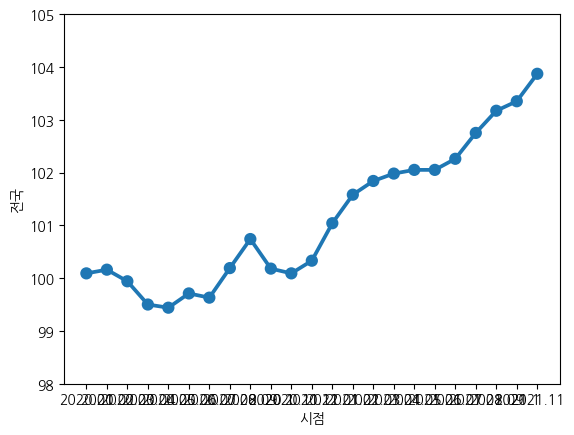

In [117]:
plt.ylim([98,105])
sns.pointplot(x = '시점', y='전국',data=flw)
sns.lineplot(x = 'month', y='매출',data=data)
#plt.xscale(95,105)

<AxesSubplot:xlabel='month', ylabel='매출'>

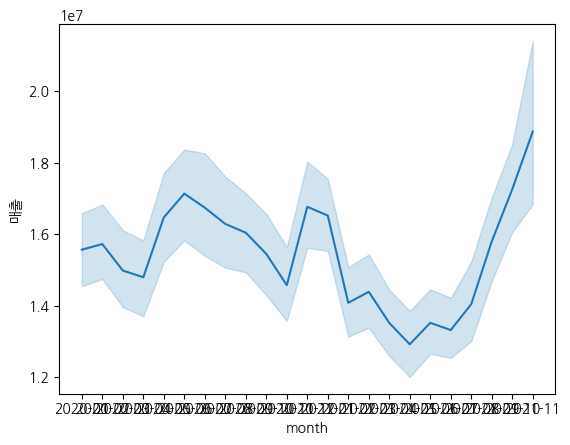

In [118]:
sns.lineplot(x = 'month', y='매출',data=data)

In [147]:
data['실패'] = np.where(data['금액달성률']<100, 1, 0)
data['MD'] = np.where(data["MD담당자명"].str[:3]==data["MD담당자명"].str[4:7], data["MD담당자명"].str[:3], data["MD담당자명"])
dd = data.groupby(['카테고리', '협력사명'])['실패'].agg(['sum', 'count'])
de = data.groupby(['카테고리', '협력사명'])['매출'].agg(['sum', 'count'])
df = data.groupby(['카테고리'])['매출'].agg(['sum', 'count'])
df

,sum,count
카테고리,,
가공농산,18449701935,1251
가공수산,22702933114,894
가공축산,20163299812,1134
가전,20630346411,1013
건강식품,34847965524,1945
레포츠기기,7665870797,501
레포츠의류,2934144540,238
문화서비스,8014593129,445
보석,5663241005,879


In [152]:
dd = gasu['협력사명']
len(sinsu['협력사명'].unique())

34

In [151]:
#len(gasu['협력사명'].unique())
(len(sinnong['협력사명'].unique())+len(gasu['협력사명'].unique())+len(sinsu['협력사명'].unique())+\
len(clothes['협력사명'].unique())+len(life['협력사명'].unique())+len(health['협력사명'].unique()))/len(data['협력사명'].unique())

0.547576301615799

In [156]:
len(life['협력사명'].unique())

72

In [185]:
#가공수산
data1 = data[['실패','PD', 'TD', 'MD', 'SH', '카테고리']]
gasu = data1[data1['카테고리'] == '가공수산']
gasu1 = gasu.groupby(['PD', 'TD', 'MD', 'SH'])['실패'].agg(['sum', 'count'])
gasu1['성공비율'] = 1-(gasu1['sum']/gasu1['count'])
gasu1.to_csv('가공수산.csv')

In [186]:
#신선농산
data1 = data[['실패','PD', 'TD', 'MD', 'SH', '카테고리']]
sinnong = data1[data1['카테고리'] == '신선농산']
sinnong1 = sinnong.groupby(['PD', 'TD', 'MD', 'SH'])['실패'].agg(['sum', 'count'])
sinnong1['성공비율'] = 1-(sinnong1['sum']/sinnong1['count'])
sinnong1.to_csv('신선농산.csv')

In [187]:
#신선수산
data1 = data[['실패','PD', 'TD', 'MD', 'SH', '카테고리']]
sinsu = data1[data1['카테고리'] == '신선수산']
sinsu1 = sinsu.groupby(['PD', 'TD', 'MD', 'SH'])['실패'].agg(['sum', 'count'])
sinsu1['성공비율'] = 1-(sinsu1['sum']/sinsu1['count'])
sinsu1.to_csv('신선수산.csv')

In [193]:
#의류
data1 = data[['실패','PD', 'TD', 'MD', 'SH', '카테고리']]
clothes = data1[data1['카테고리'] == '의류']
clothes1 = clothes.groupby(['PD', 'TD', 'MD', 'SH'])['실패'].agg(['sum', 'count'])
clothes1['성공비율'] = 1-(clothes1['sum']/clothes1['count'])
clothes1.to_csv('의류.csv')

In [194]:
#생활용품
data1 = data[['실패','PD', 'TD', 'MD', 'SH', '카테고리']]
life = data1[data1['카테고리'] == '생활용품']
life1 = life.groupby(['PD', 'TD', 'MD', 'SH'])['실패'].agg(['sum', 'count'])
life1['성공비율'] = 1-(life1['sum']/life1['count'])
life1.to_csv('생활용품.csv')

In [195]:
#생활용품
data1 = data[['실패','PD', 'TD', 'MD', 'SH', '카테고리']]
health = data1[data1['카테고리'] == '건강식품']
health1 = health.groupby(['PD', 'TD', 'MD', 'SH'])['실패'].agg(['sum', 'count'])
health1['성공비율'] = 1-(health1['sum']/health1['count'])
health1.to_csv('건강식품.csv')

In [316]:
# 
df = pd.read_csv('/home/piai/python/A3_홈쇼핑/1114_data.csv')
df1 = df[df['date']<'2021-09-01']

In [319]:
df['월'] = df['month'].str[5:7]
df['월'] = df['월'].astype(int)
df['계절'] = np.where(df['월']<3, "겨울", np.where(df['월']<6, "봄", 
                                              np.where(df['월']<9, "여름", np.where(df['월']<12, "가을", "겨울"))))
df['primetime'] = np.where(df['hour']>23, 'none', np.where(df['hour']>18, 'prime', 
                                                      np.where(df['hour']>11, 
                                                               'none', np.where(df['hour']>6, 'prime', 'none'))))

# 가설검정

In [13]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [337]:
# Sort them into groups, according to column 1
df2 = df[['매출', "계절", "카테고리"]]

group1 = df2[df2['계절']=="봄"]
group2 = df2[df2['계절']=="여름"]
group3 = df2[df2['계절']=="가을"]
group4 = df2[df2['계절']=="겨울"]

<AxesSubplot:xlabel='계절', ylabel='매출'>

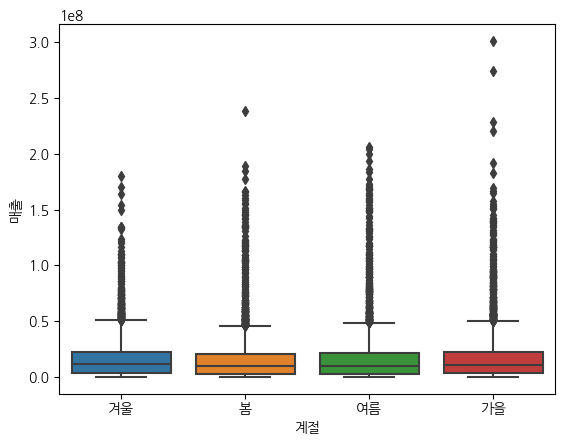

In [338]:
# Sort them into groups, according to column 1
# matplotlib plotting
sns.boxplot(data = df2, y='매출', x = '계절')

In [331]:
F_statistic, pVal = stats.f_oneway(group1['매출'], group2['매출'], group3['매출'], group4['매출'])

print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

일원분산분석 결과 : F=7.4, p=0.00007
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


<AxesSubplot:xlabel='매입형태', ylabel='매출'>

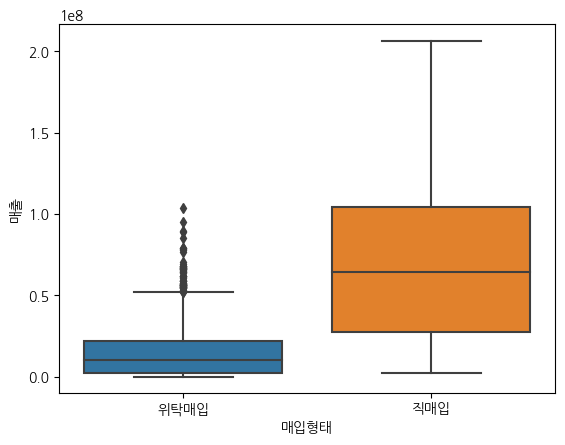

In [332]:
df2 = df[['매출', "매입형태", '카테고리']]
df2 = df[df['카테고리']=='건강식품']

# group1 = df2[df2['매입형태']=='직매입']
# group2 = df2[df2['매입형태']=='위탁매입']

sns.boxplot(data = df2, y='매출', x = '매입형태')

In [333]:
from scipy.stats import shapiro
shapiro(df2['매출']) # 정규성 만족안함

from scipy.stats import levene
levene(group1['매출'], group2['매출']) #등분산상 만족
# 2-sample t-test 
stats.ttest_ind(group1['매출'], group2['매출'], equal_var = True)
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


<AxesSubplot:xlabel='배송방식', ylabel='매출'>

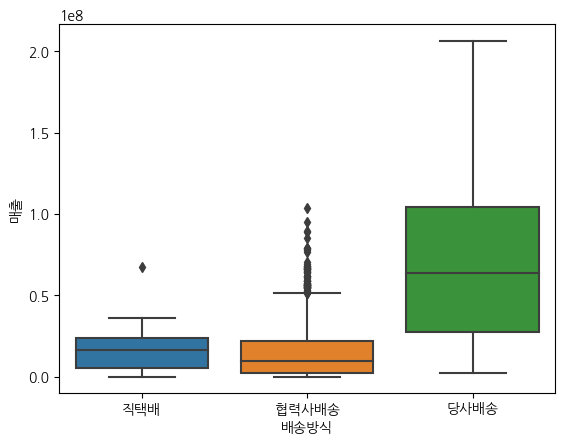

In [346]:
df2 = df[['매출', "배송방식", '카테고리']]
df2 = df[df['카테고리']=='건강식품']

group1 = df2[df2['배송방식']=='협력사배송']
group2 = df2[df2['배송방식']=='직택배']
group3 = df2[df2['배송방식']=='당사배송']

sns.boxplot(data = df2, y='매출', x = '배송방식')

In [336]:
from scipy.stats import shapiro
shapiro(df2['매출']) # 정규성 만족안함

#from scipy.stats import levene
levene(group1['매출'], group2['매출'], group3['매출']) #등분산상 만족
# ANOVA
F_statistic, pVal = stats.f_oneway(group1['매출'], group2['매출'], group3['매출'])

print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석 결과 : F=456.2, p=0.00000


<AxesSubplot:xlabel='primetime', ylabel='매출'>

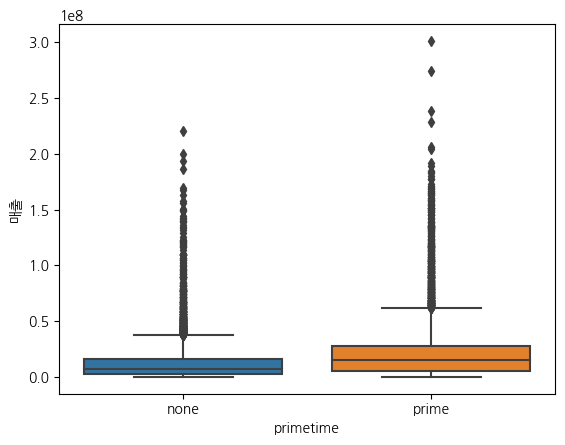

In [326]:
df2 = df[['매출', 'primetime']]
group1 = df2[df2['primetime']=='prime']
group2 = df2[df2['primetime']=='none']

sns.boxplot(data = df2, y='매출', x = 'primetime')

In [327]:
sns.palplot(sns.color_palette("Blues"))from scipy.stats import shapiro
shapiro(df2['매출']) # 정규성 만족안함

from scipy.stats import levene
levene(group1['매출'], group2['매출']) #등분산상 만족
# 2-sample t-test 
stats.ttest_ind(group1['매출'], group2['매출'], equal_var = True)
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


/home/piai/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<AxesSubplot:xlabel='date', ylabel='매출'>

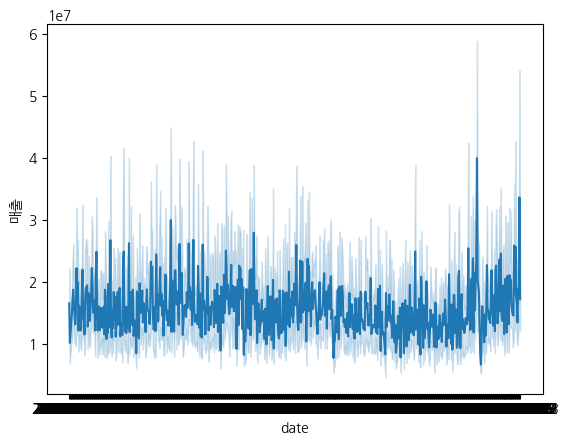

In [347]:
sns.lineplot(data = df, x = 'date', y='매출')

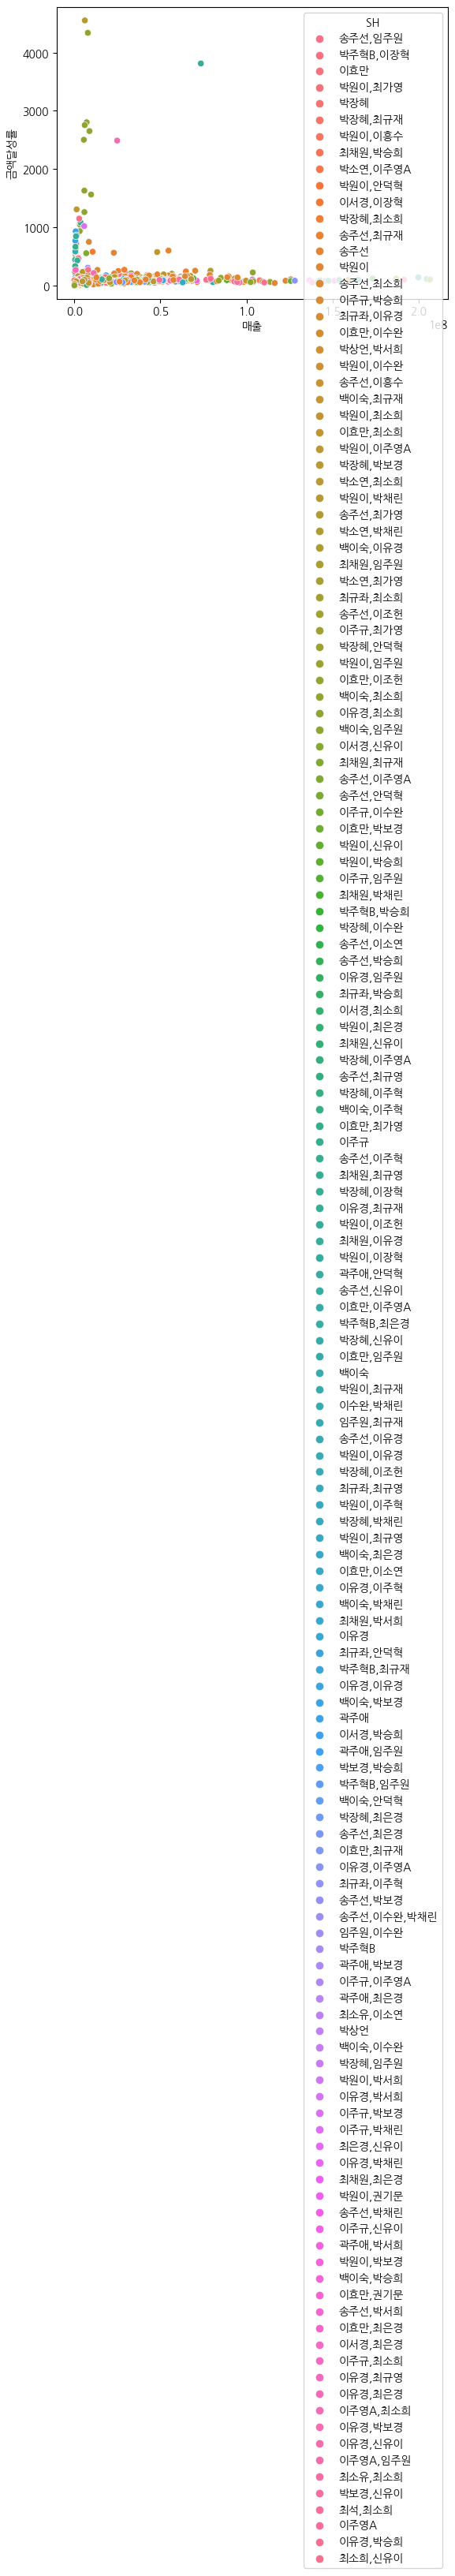

In [352]:
df_health = df[df['카테고리']=='건강식품']
sns.scatterplot(data = df_health, x='매출', y='금액달성률', hue = 'SH')
plt.show()

<AxesSubplot:xlabel='목요일금요일', ylabel='매출'>

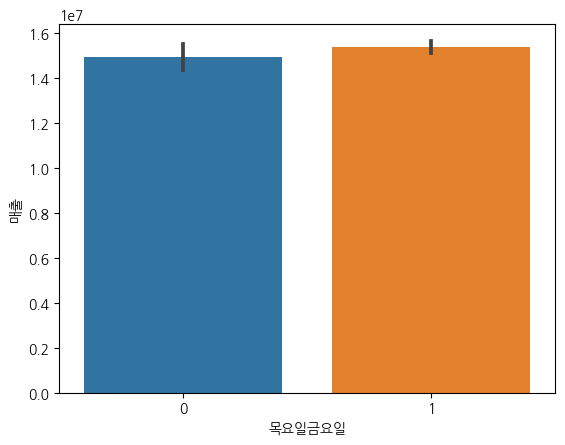

In [414]:
df = pd.read_csv('/home/piai/python/A3_홈쇼핑/1114_data.csv')

df['요일'].replace([0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 1, 1, 0, 0])
df['목요일금요일'] = np.where(df['요일'] == 0, 0, 1)
sns.barplot(y='매출', x = '목요일금요일', data = df)

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import mannwhitneyu

df = pd.read_csv('/home/piai/python/A3_홈쇼핑/1114_data.csv')
df['요일'].replace([0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 1, 1, 0, 0])
df['목요일금요일'] = np.where(df['요일'] == 0, 0, 1)

df2 = df[['목요일금요일', '매출']]
group1 = df2[df2['목요일금요일']==1]['매출']
group2 = df2[df2['목요일금요일']==0]['매출']

shapiro(df2) # 정규성 만족안함

levene(group1, group2) #등분산성 만족 안함


t_stat_x1, p_val_x1 = stats.kstest(group1, 'norm', args=(group1.mean(), group1.var()**0.5))
t_stat_x2, p_val_x2 = stats.kstest(group2, 'norm', args=(group2.mean(), group2.var()**0.5))

print('[x1]  t-statistics:', t_stat_x1, '  p-value:', p_val_x1)
print('[x2]  t-statistics:', t_stat_x2, '  p-value:', p_val_x2)


[x1]  t-statistics: 0.20816092589488727   p-value: 0.0
[x2]  t-statistics: 0.19075918440605372   p-value: 1.9781404960935311e-109
Statistics=35494386.500, p=0.867


/home/piai/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [417]:
stats.ttest_ind(group1['매출'], group2['매출'], equal_var=True)

Ttest_indResult(statistic=1.2725852883977185, pvalue=0.20317745950693009)

In [408]:
df.groupby(['카테고리', '소분류', 'month'])['매출'].agg(['count', 'sum'])
a = df.pivot_table(index = ['카테고리', '소분류'], columns = 'month', values = '매출')
a.to_csv('month_카테고리_소분류_매출.csv')

In [374]:
df3 = df[df['date']<'2021-11-01']

In [375]:
df3.tail()

,Unnamed: 0,방송Code,소요분,가중분,방송구분,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,...,단위시간영업효율,상품목표주문수량,금액달성률,month,weekend,카테고리,월,계절,primetime,목요일금요일
23719,24581,10062574244808,60.2,98.1,생방송,11162040,아라벨르 데일리 소프트플란넬 극세사 침구세트 (Q),과세,34500782,48592650,...,162.96,974,70.93,2021-10,1,침구,10,가을,prime,1
23720,24582,10062574144808,60.2,98.1,생방송,11162039,아라벨르 데일리 소프트플란넬 극세사 침구세트 (K),과세,34500782,48592650,...,162.96,811,47.42,2021-10,1,침구,10,가을,prime,1
23721,24583,10212574410370,60.0,95.1,생방송,11169039,[사용불가]완도 大활전복 18미(미당65g~80g)_3,면세,143878396,166912293,...,158.50,4081,98.25,2021-10,1,신선수산,10,가을,prime,1
23722,24584,10122574644592,75.0,69.5,생방송,11119365,[M9]여성스트레치밴딩데님3종,과세,46576023,80303488,...,92.67,2013,93.88,2021-10,1,레포츠의류,10,가을,prime,1
23723,24585,10102574544334,75.0,69.5,생방송,11100570,바바르덕다운 롱코트,과세,47016111,83957341,...,92.67,2808,167.29,2021-10,1,의류,10,가을,prime,1


In [390]:
data = pd.read_csv('/home/piai/python/A3_홈쇼핑/코로나.csv')
df3['매출1'] = df3['매출']/1000000

/tmp/ipykernel_26363/771814085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['매출1'] = df3['매출']/1000000


<AxesSubplot:xlabel='date', ylabel='매출1'>

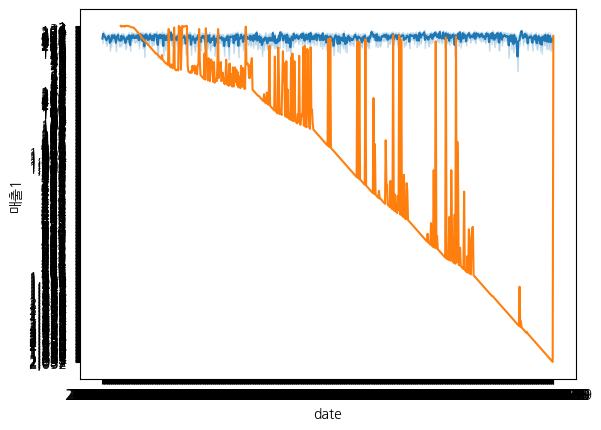

In [391]:
sns.lineplot(data = df3, x='date', y='매출1')
sns.lineplot(data = data, x='일자',y='COVID-19')

In [389]:
a = df3.groupby(['date'])['매출'].agg(['sum'])
a.to_csv('일자별_매출.csv')

In [431]:
co_sum = pd.read_csv('/home/piai/python/A3_홈쇼핑/일자별_매출.csv')
co_sum['매출1'] = co_sum['매출']/100000000
co_sum.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      667 non-null    object 
 1   매출        667 non-null    int64  
 2   COVID-19  624 non-null    object 
 3   매출1       667 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 21.0+ KB


<AxesSubplot:xlabel='date', ylabel='매출1'>

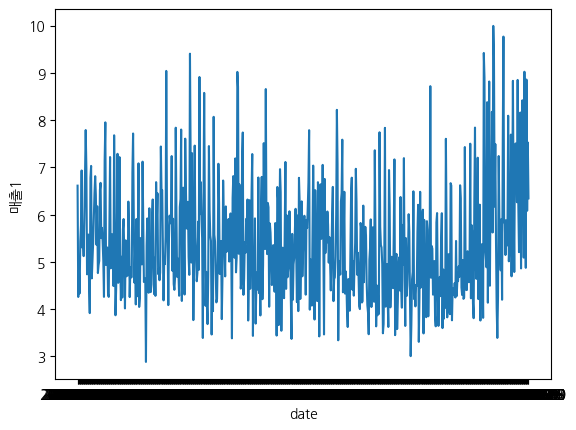

In [432]:
co_sum1 = co_sum[['COVID-19', 'date']]
sns.lineplot(data = co_sum, x ='date', y = '매출1')


In [20]:
df['실패'] = np.where(df['금액달성률']<100, 1, 0)
de = df.groupby(['카테고리'])['실패'].agg(['sum', 'count'])
de['실패비율'] = (de['sum']/de['count']).round(3)
de['성공비율'] = 1-de['실패비율'].round(3)
de.to_csv('카테고리별 성공비율.csv')
de.reset_index(inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '가공농산'),
  Text(1, 0, '가공수산'),
  Text(2, 0, '가공축산'),
  Text(3, 0, '가전'),
  Text(4, 0, '건강식품'),
  Text(5, 0, '레포츠기기'),
  Text(6, 0, '레포츠의류'),
  Text(7, 0, '문화서비스'),
  Text(8, 0, '보석'),
  Text(9, 0, '상조'),
  Text(10, 0, '생활용품'),
  Text(11, 0, '신선농산'),
  Text(12, 0, '신선수산'),
  Text(13, 0, '신선축산'),
  Text(14, 0, '언더웨어'),
  Text(15, 0, '의류'),
  Text(16, 0, '이미용'),
  Text(17, 0, '인테리어'),
  Text(18, 0, '잡화'),
  Text(19, 0, '주방용품'),
  Text(20, 0, '침구')])

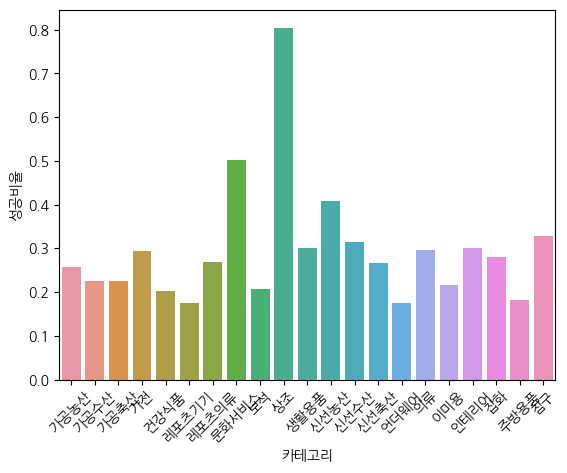

In [21]:
sns.barplot(y='성공비율', x = '카테고리', data = de)
plt.xticks(rotation = 45)